##River and Spring Discharge:
###Hillsborough River at Crystal Springs near Zephyrhills, FL
This iPython Notebook is used to download data from NWIS Web, plot data, and compute spring discharge for Crystal Springs.

First, we import the relevant libraries and set the start and end dates.

In [1]:
%matplotlib inline
import sys
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append(r'D:\Data\Users\jbellino\GitHub\nwisweb')
import nwisweb2 as nwis
plt.style.use('ggplot')

start = '2015-01-01'
end = '2016-05-19'

Next, we load data from NWIS Web for USGS gaging stations above (02301990) and below (02302010) Crystal Springs

In [2]:
# load data for 02302010, Hillsborough River below Crystal Springs
below, p = nwis.get_dv_data('02302010', provisional=True, params=['00060'])
below = below['01_00060_00003']
below.name = 'River Discharge (below)'

# load data for 02301990, Hillsborough River above Crystal Springs
above, p = nwis.get_dv_data('02301990', provisional=True, params=['00060'])
above = above['01_00060_00003']
above.name = 'River Discharge (above)'

# create a Pandas DataFrame object with the data from the above Series as columns
q = pd.concat([above[start:end], below[start:end]], axis=1)
q.head()

,River Discharge (above),River Discharge (below)
measurement_dt,,
2015-01-01,39,91
2015-01-02,38,89
2015-01-03,37,88
2015-01-04,36,87
2015-01-05,35,85


Plot the river discharge data we downloaded above

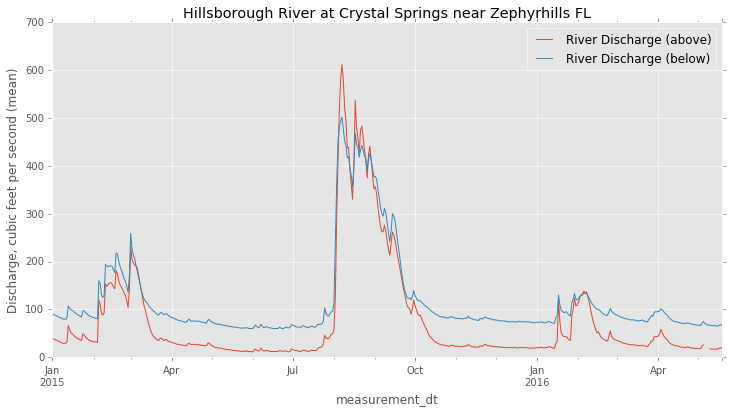

In [3]:
# Create a pyplot object and set title and y-axis label
fig, ax = plt.subplots(figsize=(12, 6))
title = 'Hillsborough River at Crystal Springs near Zephyrhills FL'
ax.set_ylabel('Discharge, cubic feet per second (mean)')

# plot the data from our DataFrame, "q".
q.plot(kind='line', ax=ax, title=title)

# save and show the figure
fig.savefig('river_q.pdf')
plt.show()

Compute discharge of Crystal Springs by subtracting the flow at the gage above from the gage below (this makes a new column in our DataFrame called "Spring Discharge")

In [4]:
q['Spring Discharge'] = q['River Discharge (below)'] - q['River Discharge (above)']
q.head()

,River Discharge (above),River Discharge (below),Spring Discharge
measurement_dt,,,
2015-01-01,39,91,52
2015-01-02,38,89,51
2015-01-03,37,88,51
2015-01-04,36,87,51
2015-01-05,35,85,50


Now plot the spring discharge. **Note the large reversal of flow back into the spring vent during August of 2015.

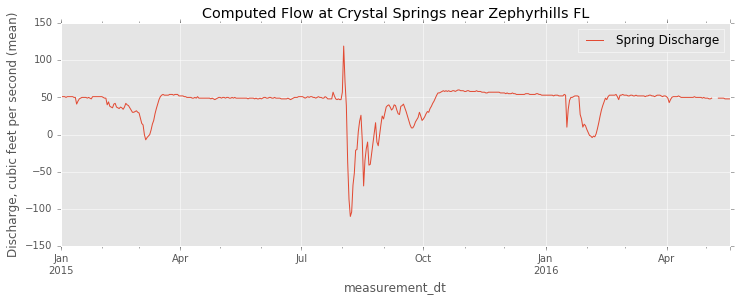

In [5]:
# Create a pyplot object and set title and y-axis label
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_ylabel('Discharge, cubic feet per second (mean)')
title = 'Computed Flow at Crystal Springs near Zephyrhills FL'

# plot only the "Spring Discharge" data from our DataFrame, "q".
q['Spring Discharge'].plot(figsize=(12, 4), title=title, legend=True)

# save and show the figure
fig.savefig('spring_q.pdf')
plt.show()

Compute the percent contribution to total streamflow from Crystal Springs (this makes a new column in our DataFrame called "Percent")

In [6]:
q['Percent'] = (q['Spring Discharge'] / q['River Discharge (below)']) * 100.
q.head()

,River Discharge (above),River Discharge (below),Spring Discharge,Percent
measurement_dt,,,,
2015-01-01,39,91,52,57.142857
2015-01-02,38,89,51,57.303371
2015-01-03,37,88,51,57.954545
2015-01-04,36,87,51,58.620690
2015-01-05,35,85,50,58.823529


Now plot percent contribution

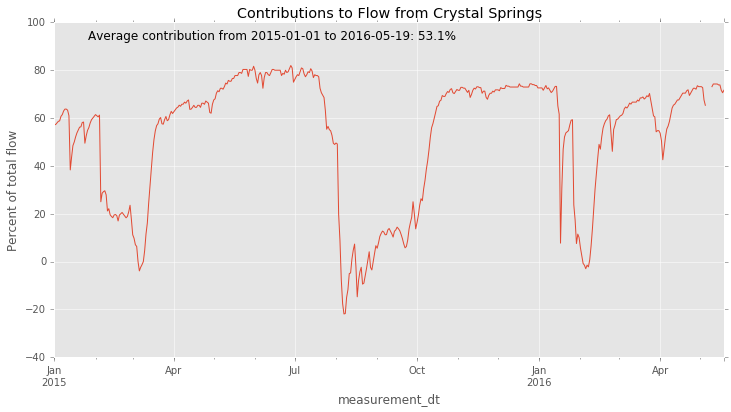

In [7]:
# Create a pyplot object and set title and y-axis label
fig, ax = plt.subplots(figsize=(12, 6))
title = 'Contributions to Flow from Crystal Springs'
ax.set_ylabel('Percent of total flow')

# plot only the "Percent" data from our DataFrame, "q".
q['Percent'].plot(kind='line', ax=ax, title=title)

# add some text to the plot
s = 'Average contribution from {} to {}: {:.1f}%'.format(start, end, q['Percent'].mean())
t = ax.text(.05, .95, s, size=12, transform=ax.transAxes)

# save and show the figure
fig.savefig('spring_contrib.pdf')
plt.show()